<a href="https://colab.research.google.com/github/srivastavanimish/SHALA2020/blob/master/ML_L1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [ ]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [ ]:
attrition_data.count()
#apparently no nulls

Age                         1028
Attrition                   1028
BusinessTravel              1028
DailyRate                   1028
Department                  1028
DistanceFromHome            1028
Education                   1028
EducationField              1028
EmployeeCount               1028
EmployeeNumber              1028
EnvironmentSatisfaction     1028
Gender                      1028
HourlyRate                  1028
JobInvolvement              1028
JobLevel                    1028
JobRole                     1028
JobSatisfaction             1028
MaritalStatus               1028
MonthlyIncome               1028
MonthlyRate                 1028
NumCompaniesWorked          1028
OverTime                    1028
PercentSalaryHike           1028
PerformanceRating           1028
RelationshipSatisfaction    1028
StockOptionLevel            1028
TotalWorkingYears           1028
TrainingTimesLastYear       1028
WorkLifeBalance             1028
YearsAtCompany              1028
YearsInCur

In [ ]:
attrition_data.dropna().count()

Age                         1028
Attrition                   1028
BusinessTravel              1028
DailyRate                   1028
Department                  1028
DistanceFromHome            1028
Education                   1028
EducationField              1028
EmployeeCount               1028
EmployeeNumber              1028
EnvironmentSatisfaction     1028
Gender                      1028
HourlyRate                  1028
JobInvolvement              1028
JobLevel                    1028
JobRole                     1028
JobSatisfaction             1028
MaritalStatus               1028
MonthlyIncome               1028
MonthlyRate                 1028
NumCompaniesWorked          1028
OverTime                    1028
PercentSalaryHike           1028
PerformanceRating           1028
RelationshipSatisfaction    1028
StockOptionLevel            1028
TotalWorkingYears           1028
TrainingTimesLastYear       1028
WorkLifeBalance             1028
YearsAtCompany              1028
YearsInCur

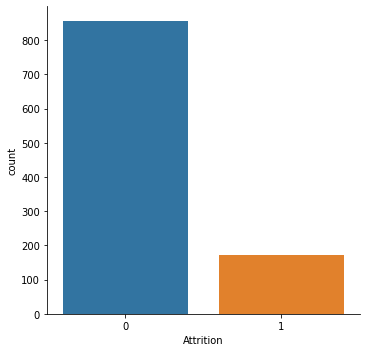

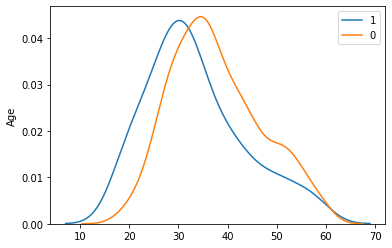

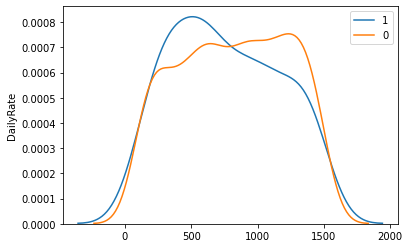

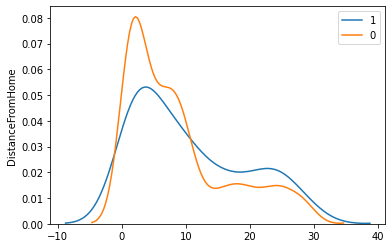

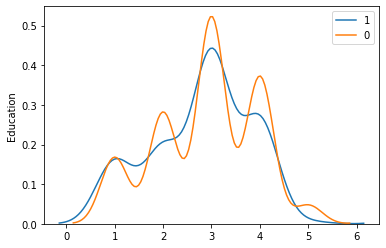

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


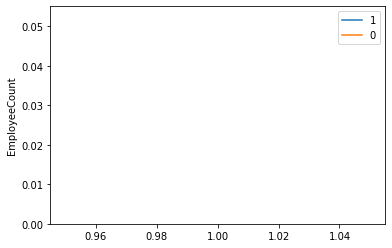

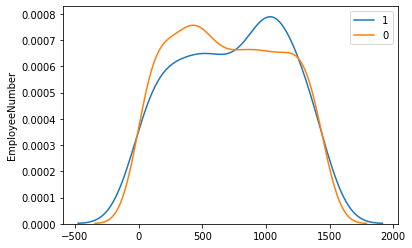

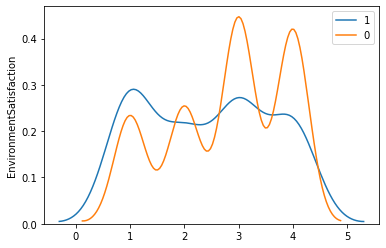

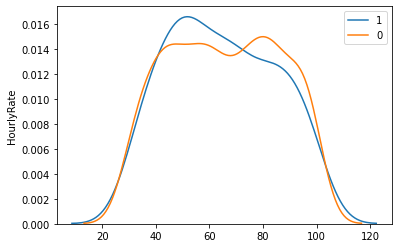

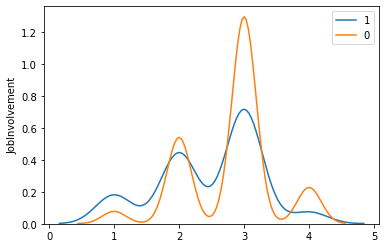

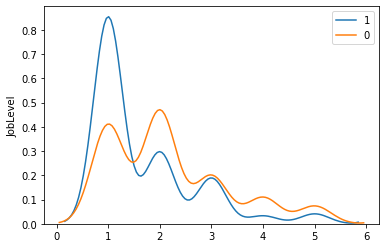

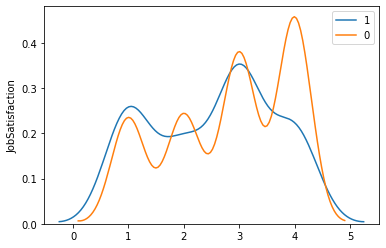

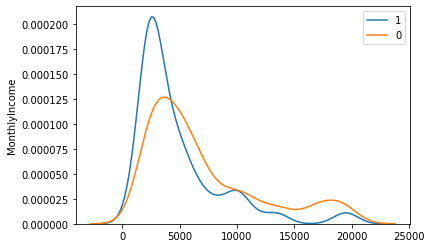

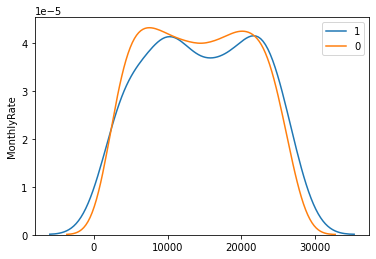

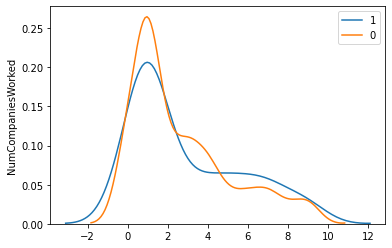

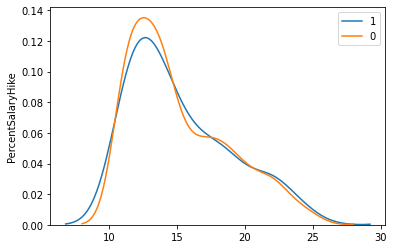

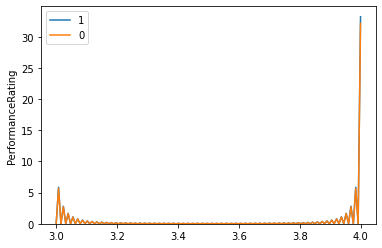

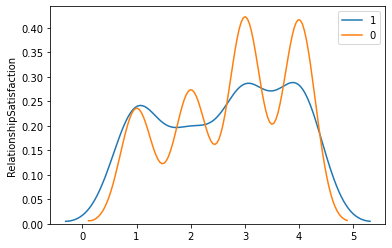

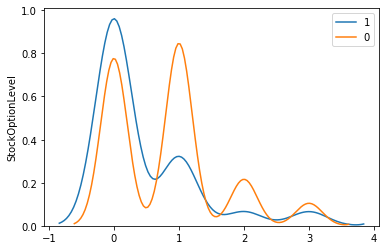

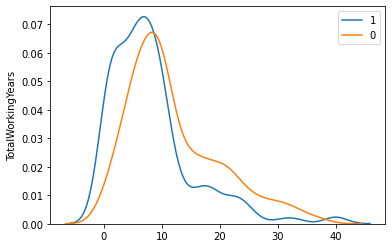

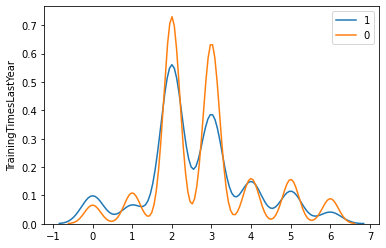

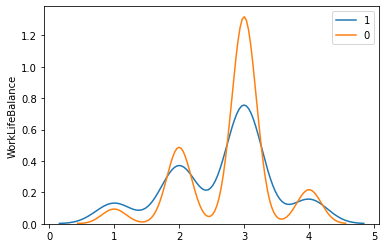

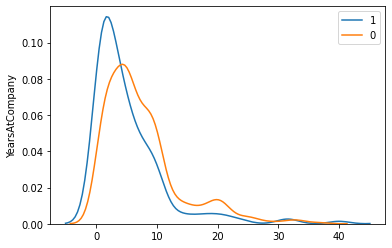

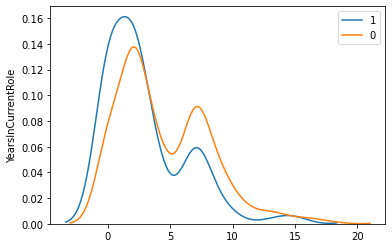

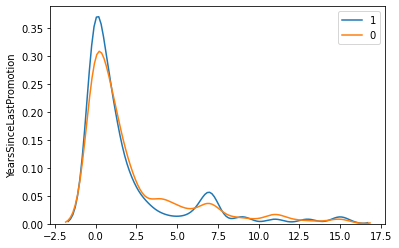

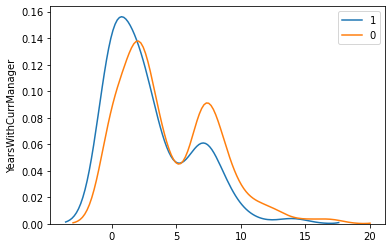

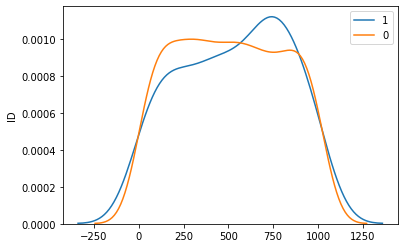

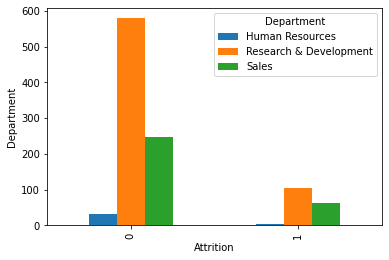

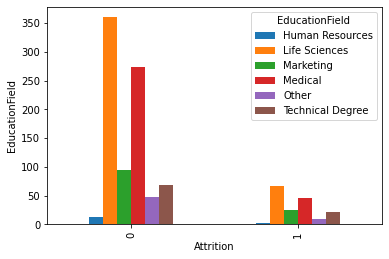

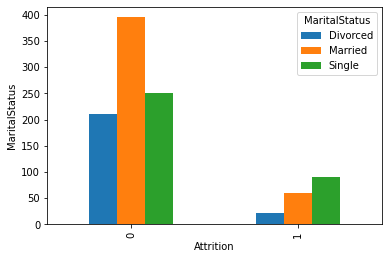

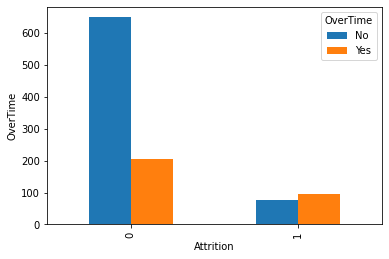

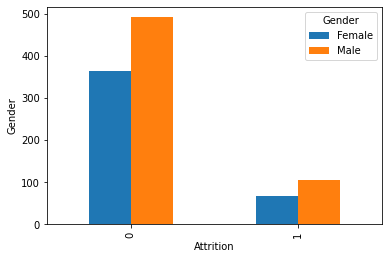

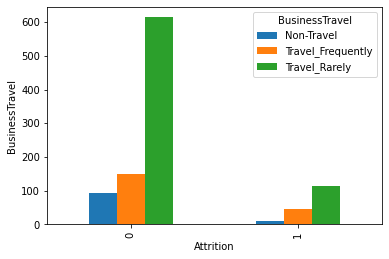

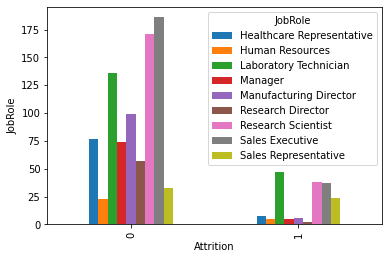

In [ ]:
#find unique targets: customize this!!
target_col = 'Attrition'
unique_targets = attrition_data[target_col].unique()

targets = [attrition_data.loc[attrition_data.Attrition==val] for val in unique_targets]

sns.catplot(x=target_col, kind='count',data=attrition_data)
plt.xlabel(target_col)
plt.show()
#for numeric data
for col in attrition_data._get_numeric_data().columns:
  if col!=target_col:
    for i in range(len(targets)):
      sns.distplot(targets[i][[col]], hist=False, label=unique_targets[i])
      plt.ylabel(col)
    plt.show()

#for others
#for numeric data
for col in list(set(attrition_data.columns) - set(attrition_data._get_numeric_data().columns)):
  if col!=target_col:
    pd.crosstab(attrition_data[target_col],attrition_data[col]).plot(kind='bar')
    #attrition_data[col] = dummies
    plt.ylabel(col)
    plt.show()

In [ ]:
df = attrition_data.drop(columns=['EmployeeCount','ID'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


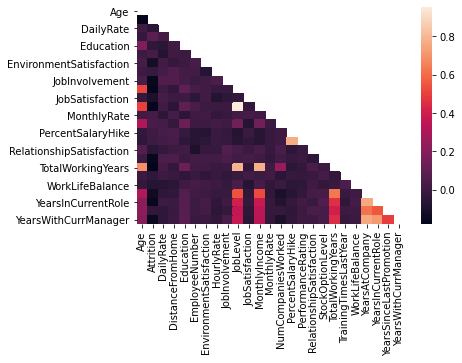

In [ ]:
df_corr = df.corr()

mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr,mask = mask)

In [ ]:
#one hot encode categorical
df = pd.get_dummies(df, columns = list(set(df.columns) - set(df._get_numeric_data().columns)))
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Gender_Female,Gender_Male,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0


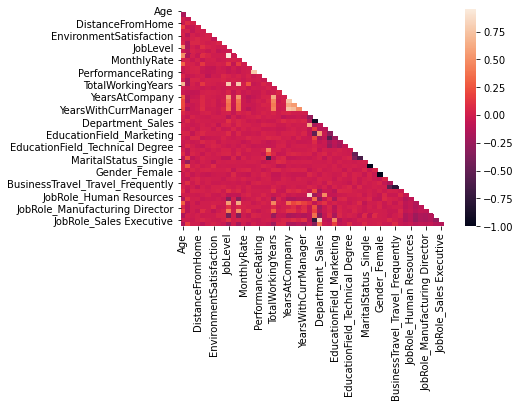

In [ ]:
df_corr = df.corr()

mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr,mask = mask)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, plot_roc_curve, precision_score, auc

X = df.drop(columns=[target_col])
Y = df[target_col]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=13)

xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=13,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuray: 0.8786407766990292
Precison: 0.8181818181818182


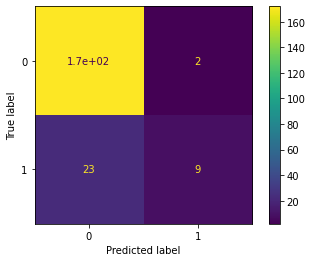

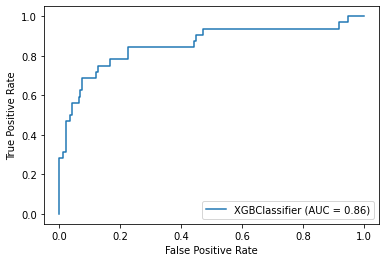

In [ ]:
Y_pred = xgb_classifier.predict(X_test)

print(plot_confusion_matrix(xgb_classifier, X_test, Y_test))
print("Accuray: "+str(accuracy_score(Y_test, Y_pred)))
print("Precison: "+str(precision_score(Y_test, Y_pred)))
print(plot_roc_curve(xgb_classifier, X_test, Y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=10)

rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuray: 0.8640776699029126
Precison: 0.8333333333333334


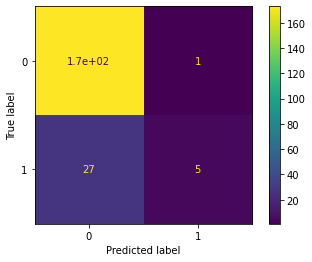

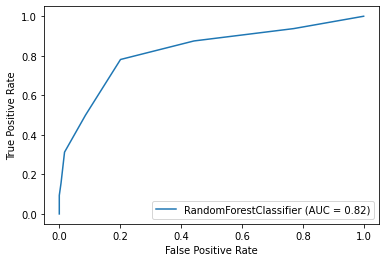

In [ ]:
Y_pred = rf_classifier.predict(X_test)

print(plot_confusion_matrix(rf_classifier, X_test, Y_test))
print("Accuray: "+str(accuracy_score(Y_test, Y_pred)))
print("Precison: "+str(precision_score(Y_test, Y_pred)))
print(plot_roc_curve(rf_classifier, X_test, Y_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuray: 0.7475728155339806
Precison: 0.2222222222222222


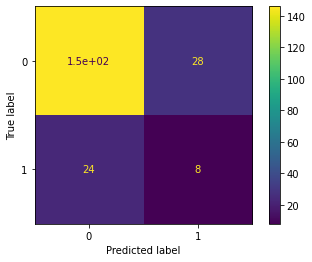

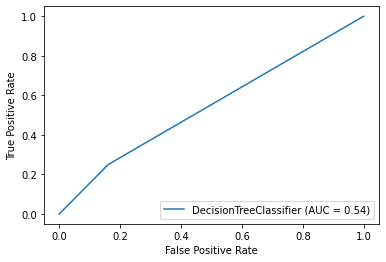

In [ ]:
Y_pred = dt_classifier.predict(X_test)

print(plot_confusion_matrix(dt_classifier, X_test, Y_test))
print("Accuray: "+str(accuracy_score(Y_test, Y_pred)))
print("Precison: "+str(precision_score(Y_test, Y_pred)))
print(plot_roc_curve(dt_classifier, X_test, Y_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_classifier = KNeighborsClassifier(n_neighbors=5)

kn_classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuray: 0.8106796116504854
Precison: 0.1111111111111111


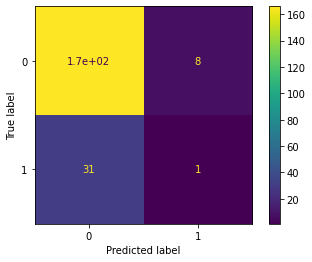

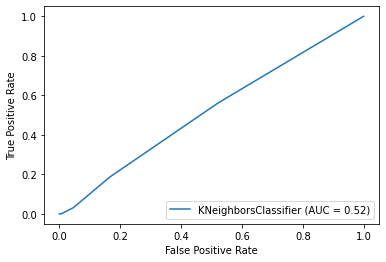

In [ ]:
Y_pred = kn_classifier.predict(X_test)

print(plot_confusion_matrix(kn_classifier, X_test, Y_test))
print("Accuray: "+str(accuracy_score(Y_test, Y_pred)))
print("Precison: "+str(precision_score(Y_test, Y_pred)))
print(plot_roc_curve(kn_classifier, X_test, Y_test))

In [ ]:
#Balance classes by random down-sample 1.5*majority, 1*minority
df_minority  = df[df[target_col]==1]
df_majority = df[df[target_col]==0]

sample_ratio = (2.*len(df_minority))/len(df_majority)
df_majority = df_majority.sample(frac = sample_ratio, random_state=23)

df = pd.concat([df_majority,df_minority])

## Shuffle the dataset to prevent the model from getting biased by similar samples
df = df.sample(frac=1, random_state=31)

In [ ]:
X = df.drop(columns=[target_col])
Y = df[target_col]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

Accuray: 0.8557692307692307
Precison: 0.9230769230769231


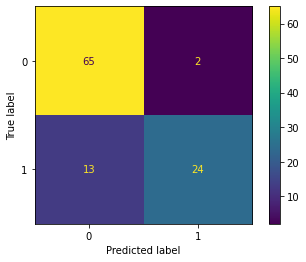

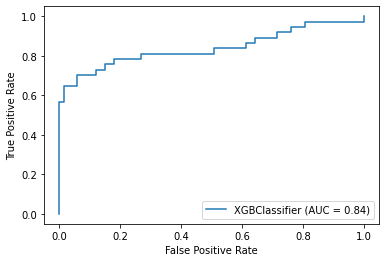

In [ ]:
xgb_classifier.fit(X_train, Y_train)

Y_pred = xgb_classifier.predict(X_test)

print(plot_confusion_matrix(xgb_classifier, X_test, Y_test))
print("Accuray: "+str(accuracy_score(Y_test, Y_pred)))
print("Precison: "+str(precision_score(Y_test, Y_pred)))
print(plot_roc_curve(xgb_classifier, X_test, Y_test))

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  